In [ ]:
!pip install powerlaw

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import networkx as nx
import pydot
import itertools
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
import pandas as pd
#import powerlaw

In [2]:
!git clone https://github.com/Alpgirl/Internet-network-analysis.git

Cloning into 'Internet-network-analysis'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 7 (delta 0), reused 4 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 2.29 MiB | 4.46 MiB/s, done.


In [4]:
original_G = nx.read_adjlist("data/itdk0304_rlinks_undirected")

In [12]:
#@title Beautiful figure transformer { form-width: "300px" }
def make_beautiful(ax):
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(4)
        ax.tick_params(width=4, direction = 'in', length = 8, pad=15)

    for axis in ['top','right']:
        ax.spines[axis].set_linewidth(0.0)

    ax.locator_params(axis='x', nbins=8)
    ax.locator_params(axis='y', nbins=8)
    ax.tick_params(axis='x', which='major', labelsize=26)
    ax.tick_params(axis='y', which='major', labelsize=26)

    ax.xaxis.label.set_size(30)
    ax.yaxis.label.set_size(30)

    params = {'legend.fontsize': 18,
              'axes.titlesize': 30,
    }

    pylab.rcParams.update(params)

    return ax


def create_default_figure(a=16, b=12):
    fig, ax = plt.subplots(figsize = (a,b))
    ax = make_beautiful(ax)

    return fig, ax

In [ ]:
#       - How many edges are in the network?
#     	- Degree, edge distribution
print('Nodes:', original_G.number_of_nodes())
print('Edges:', original_G.number_of_edges())

Nodes: 192244
Edges: 609066


In [10]:
#list of connected components

def get_connected_components(G):
    cc = list(nx.connected_components(G))
    print(len(cc))
    #sizes of connected components
    sizes = [len(comp) for comp in cc]
    print(max(sizes))
    #it's distribution

    fig, ax = plt.subplots(figsize = (12,8))
    ax = make_beautiful(ax)

    ax.hist(sizes, bins=100, log=True)

    ax.set_xlabel('number of nodes in component')
    ax.set_ylabel('Number of Instances')
    ax.set_title("Connected Components Distribution")
    return cc

308
190914


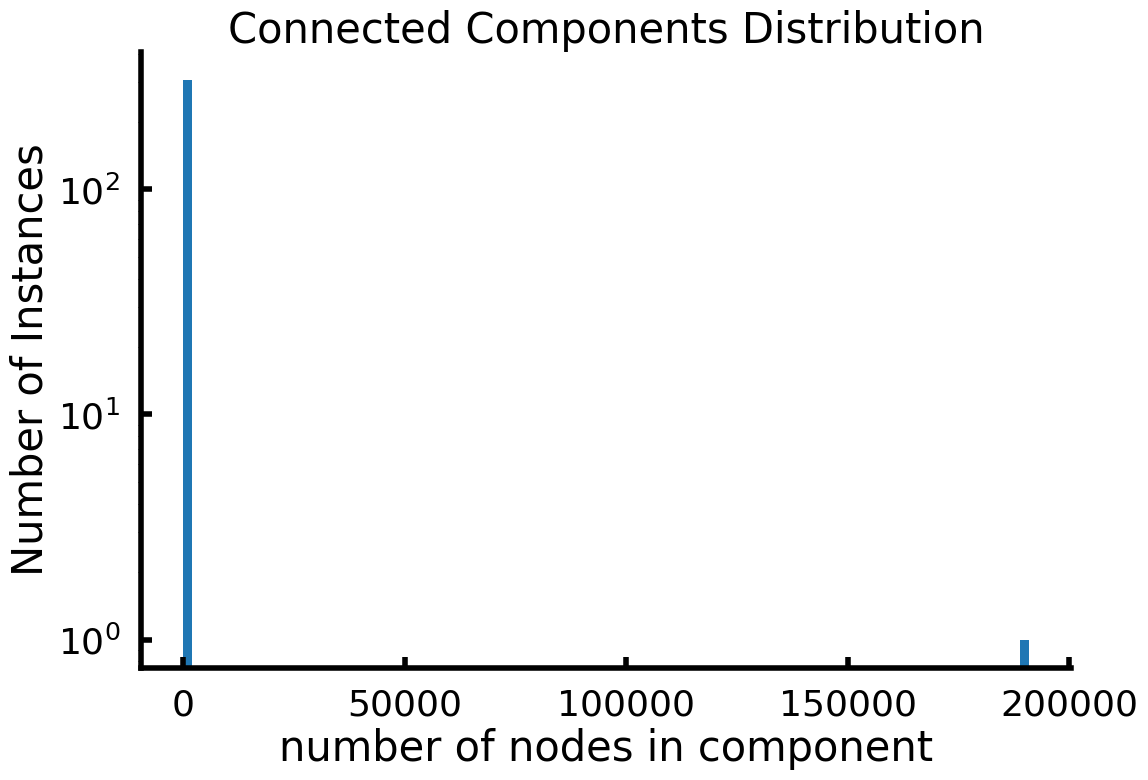

In [ ]:
cc = get_connected_components(original_G)

In [ ]:
print('Density:', nx.density(original_G))

Density: 3.296028989724229e-05


In [ ]:
190914/192244*100

99.30817086619088

In [ ]:
#Degree distribution
def degree_distribution(G):
    degrees=[d for n, d in G.degree()]
    print(np.mean(degrees))
    print('Max degree:', np.max(degrees))
    print('Min degree:', np.min(degrees))
    fig, ax = plt.subplots(figsize = (12,8))
    _ = ax.hist(degrees, bins=100, log=True)

    #ax = make_beautiful(ax)
    ax.set_title('Internet graph degree distribution')
    ax.set_xlabel('k')
    ax.set_ylabel(r'$\rho(k)$')

6.336385010715549
Max degree: 1071
Min degree: 1


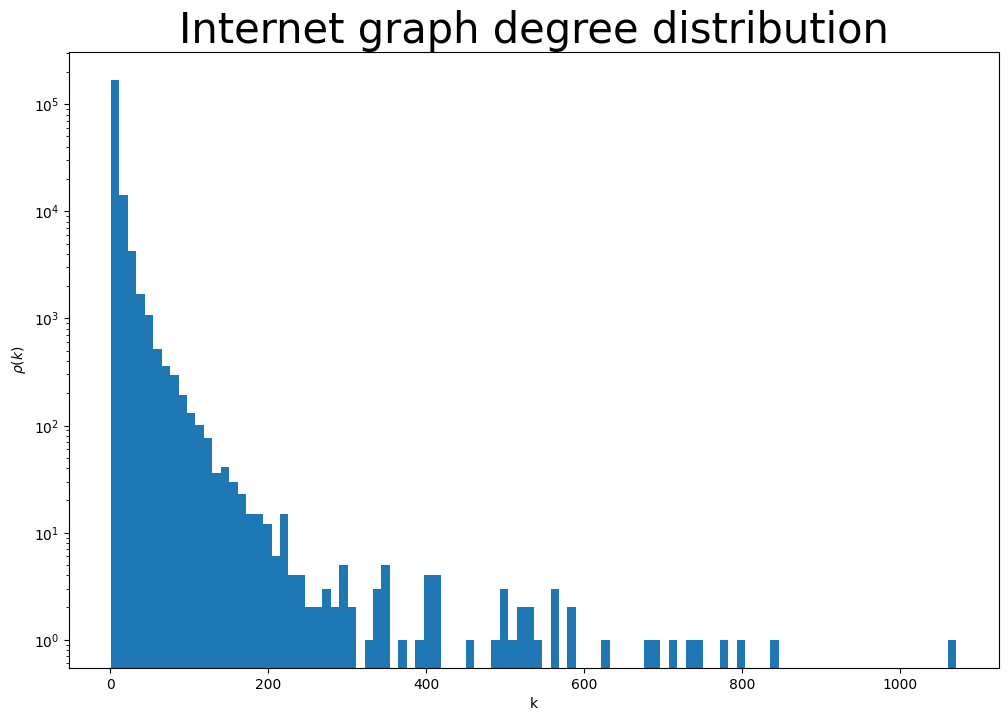

In [ ]:
degree_distribution(original_G)

In [ ]:
nx.average_clustering(original_G)

0.1574134171356701


**(2) Network Comparison to other networks(Erdos-Renyi, Scalar Free):**


In [ ]:
# NAstyas's code

In [5]:
# Reduce the number of nodes to calculate properties

remove = [node for node,degree in dict(original_G.degree()).items() if degree < 40]
G = original_G.copy()
G.remove_nodes_from(remove)

In [ ]:
remove2 = [node for node,degree in dict(original_G.degree()).items() if degree < 10]
G2 = original_G.copy()
G2.remove_nodes_from(remove2)

In [ ]:
print('Nodes:', G.number_of_nodes())
print('Edges:', G.number_of_edges())

Nodes: 3578
Edges: 45145


74
3501


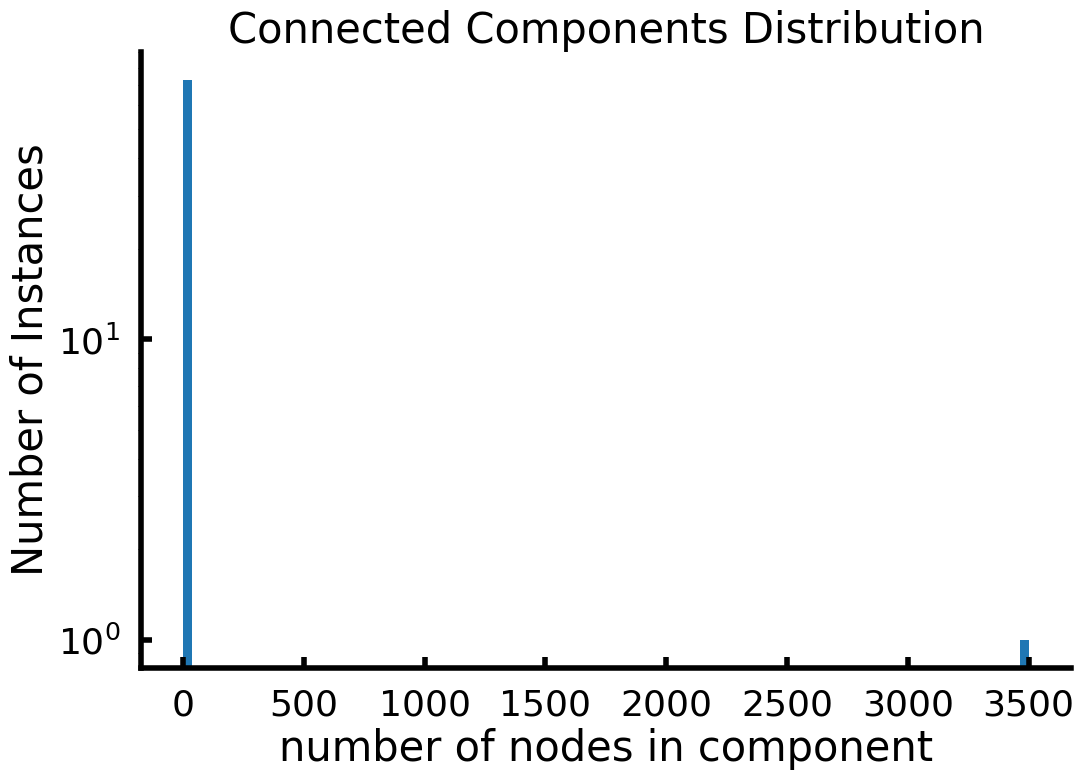

In [13]:
G_cc = get_connected_components(G)

In [ ]:
print('Density:', nx.density(G))

Density: 0.007054729669228581


In [ ]:
10759/11077*100

97.1291866028708

25.234768026830633
Max degree: 197
Min degree: 0


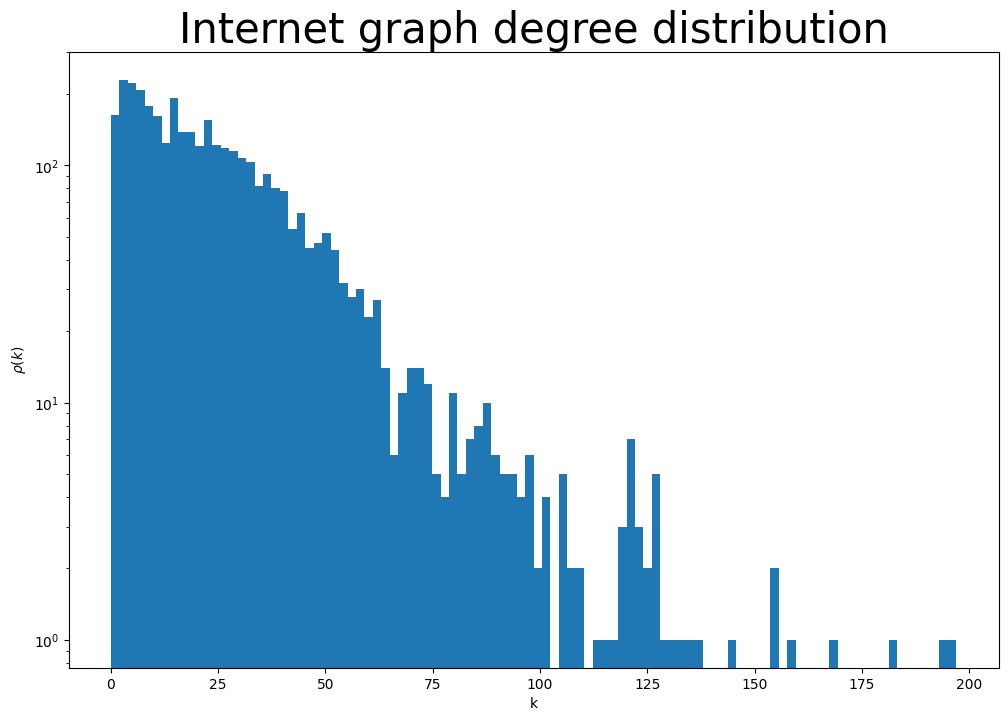

In [ ]:
degree_distribution(G)

In [15]:
largest_cc = max(nx.connected_components(G), key=len)
Giant_component = G.subgraph(largest_cc).copy()

In [16]:
len(largest_cc)

3501

Graph properties (diameter, raduis, average distance, no of connected components, size of largest cluster, connectivity, clustering coefficient...)

In [17]:
print('Diameter:', nx.diameter(Giant_component))

Diameter: 9


In [18]:
print('Average distance:', nx.average_shortest_path_length(Giant_component))

Average distance: 3.4011653813196228


In [ ]:
print('Average average clustering coefficient:', nx.average_clustering(G))

Average average clustering coefficient: 0.22071964421438892


In [ ]:
print('Average clustering coefficient of giant component:', nx.average_clustering(Giant_component))

Average average clustering coefficient in giant component: 0.15817334505180586


In [ ]:
eigenvector_centrality = eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=500, tol=1e-06)
top_10_eigenvector = top_10_centralities(eigenvector_centrality)
df_eigenvector = pd.DataFrame(top_10_eigenvector, columns=['Node', 'Eigenvector Centrality'])
print(df_eigenvector)

    Node  Eigenvector Centrality
0   8441                0.153392
1  12809                0.150115
2  14667                0.148905
3   1306                0.148794
4      6                0.148617
5  11061                0.147654
6  10801                0.147525
7    868                0.147345
8   3027                0.147163
9    103                0.144663


In [ ]:
eigenvector_centrality = eigenvector_centrality = nx.eigenvector_centrality(original_G, max_iter=500, tol=1e-06)
top_10_eigenvector = top_10_centralities(eigenvector_centrality)
df_eigenvector = pd.DataFrame(top_10_eigenvector, columns=['Node', 'Eigenvector Centrality'])
print(df_eigenvector)

    Node  Eigenvector Centrality
0   8441                0.172818
1   1306                0.167072
2      6                0.164625
3    868                0.163297
4  10801                0.161682
5  11061                0.159299
6    103                0.156216
7  12809                0.154346
8   3027                0.146139
9  14667                0.145195


### Centralities

In [ ]:
def top_10_centralities(centrality):
    return sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

In [ ]:
eigenvector_centrality = eigenvector_centrality = nx.eigenvector_centrality(G2, max_iter=500, tol=1e-06)
top_10_eigenvector = top_10_centralities(eigenvector_centrality)
df_eigenvector = pd.DataFrame(top_10_eigenvector, columns=['Node', 'Eigenvector Centrality'])
print(df_eigenvector)

    Node  Eigenvector Centrality
0   8441                0.165618
1   1306                0.159721
2    868                0.158503
3      6                0.158130
4  12809                0.156912
5  10801                0.156850
6  11061                0.154685
7    103                0.151311
8   3027                0.148767
9  14667                0.147926


In [ ]:
degree_centrality = nx.degree_centrality(G)
top_10_degree = top_10_centralities(degree_centrality)
df_degree = pd.DataFrame(top_10_degree, columns=['Node', 'Degree Centrality'])
print(df_degree)

    Node  Degree Centrality
0   8441           0.043247
1      6           0.041892
2  12809           0.041441
3   1306           0.041260
4  10801           0.041260
5    868           0.041170
6  11061           0.040538
7  14667           0.040448
8   3027           0.040358
9    103           0.039635


In [ ]:
harmonic_centrality = nx.harmonic_centrality(G)
top_10_harmonic = top_10_centralities(harmonic_centrality)
df_harmonic = pd.DataFrame(top_10_harmonic, columns=['Node', 'Harmonic Centrality'])
print(df_harmonic)

    Node  Harmonic Centrality
0    406          4366.685714
1   1351          4242.685714
2    824          4217.135714
3   1008          4127.528571
4    776          4122.378571
5   1177          4106.059524
6    640          4090.947619
7  10244          4077.388095
8  14214          4069.004762
9  10659          4064.502381


In [ ]:
closeness_centrality = nx.closeness_centrality(G)
top_10_closeness = top_10_centralities(closeness_centrality)
df_closeness = pd.DataFrame(top_10_closeness, columns=['Node', 'Closeness Centrality'])
print(df_closeness)

    Node  Closeness Centrality
0    406              0.363309
1   1351              0.353980
2    824              0.351811
3   1008              0.345734
4   1177              0.344197
5    776              0.343914
6  14214              0.342774
7  10244              0.342392
8    640              0.342112
9  10659              0.341575


In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
top_10_betweenness = top_10_centralities(betweenness_centrality)
df_betweenness = pd.DataFrame(top_10_betweenness, columns=['Node', 'Betweenness Centrality'])
print(df_betweenness)

    Node  Betweenness Centrality
0    406                0.020131
1    776                0.017181
2   1351                0.017124
3    824                0.015978
4   6849                0.013201
5    349                0.013151
6   1846                0.012791
7    672                0.011596
8   1736                0.010341
9  10244                0.009780


### Community Detection

In [ ]:
# Detect communities using Girvan_Newman method
communities_generator = nx.community.girvan_newman(G)

for communities in itertools.islice(communities_generator, 1):
    l=list(sorted(c) for c in communities)
    print(l)

# Apply different colors for communities
colors = ['b', 'r', 'y', 'g']
node_colors = {}
print(enumerate(l))
for i, c in enumerate(l):
  print(i,c)
  for node in c:
    node_colors[node] = colors[i]

# Draw a network
node_colors = dict(sorted(node_colors.items()))
nx.draw(G, with_labels=True, node_color = list(node_colors.values()))

### Network Connectivity

In [ ]:
# Calculate the number of connected components in the original graph
num_components_orig = nx.number_connected_components(G)

# Iterate through nodes to find critical nodes for disconnection
critical_nodes = []
for node in G.nodes():
    # Temporarily remove the node
    temp_graph = G.copy()
    temp_graph.remove_node(node)

    # Calculate the number of connected components after node removal
    num_components = nx.number_connected_components(temp_graph)

    # Check if the removal increased the number of connected components
    if num_components > num_components_orig:
        critical_nodes.append(node)

# Output the critical nodes and the minimum number of nodes to remove
print("Critical nodes:", critical_nodes)
print("Minimum number of nodes to remove:", len(critical_nodes))

Critical nodes: ['14638', '672', '3177', '711', '8629', '15100', '27846', '4902', '6596', '7309', '17302', '18613', '2494', '19468', '10559', '13016', '27162', '5270', '93056', '7975', '3592', '640', '9167', '7731', '24508', '14130', '27639', '22953', '8783', '6112', '48536', '7029', '13738', '2166', '7499', '5826', '4238', '2318', '9690', '4678', '2445', '2235', '8538', '31922', '799', '1470', '798', '800', '1102', '5258', '8852', '7770', '20037', '40897', '2050', '65821', '2432', '37105', '19463', '45923', '23518', '5494', '15041', '9989', '55350', '13428', '40776', '1904', '56693', '6520', '9051', '11985', '26264', '6465', '6896']
Minimum number of nodes to remove: 75


### Path Analysis

In [ ]:
# Find shortest paths between all pairs of nodes
all_shortest_paths = dict(nx.all_pairs_shortest_path(G))

min_path = len(all_shortest_paths[0][1])

pairs = []
for source_node in all_shortest_paths:
    for target_node, shortest_path in all_shortest_paths[source_node].items():
      if target_node != source_node and min_path >= len(shortest_path)-1:
        min_path = len(shortest_path)-1
        pairs.append((source_node,target_node))

print(f"Shortest path: {min_path}, Nodes: {pairs}")

Shortest path: 1, Nodes: [(0, 1), (0, 3), (0, 5), (0, 14), (0, 17), (0, 18), (1, 0), (1, 3), (1, 6), (1, 7), (1, 12), (1, 13), (1, 17), (1, 19), (2, 5), (2, 10), (2, 11), (2, 12), (2, 18), (3, 0), (3, 1), (3, 5), (3, 8), (3, 10), (3, 15), (4, 15), (5, 0), (5, 2), (5, 3), (5, 9), (6, 1), (6, 8), (6, 13), (6, 19), (7, 1), (7, 10), (7, 13), (8, 3), (8, 6), (8, 9), (8, 12), (8, 16), (9, 5), (9, 8), (9, 13), (9, 19), (10, 2), (10, 3), (10, 7), (10, 13), (10, 14), (10, 15), (10, 17), (10, 18), (11, 2), (11, 12), (11, 13), (11, 14), (11, 15), (11, 16), (12, 1), (12, 2), (12, 8), (12, 11), (12, 14), (12, 15), (12, 16), (12, 18), (13, 1), (13, 6), (13, 7), (13, 9), (13, 10), (13, 11), (13, 18), (14, 0), (14, 10), (14, 11), (14, 12), (14, 17), (15, 3), (15, 4), (15, 10), (15, 11), (15, 12), (15, 17), (15, 18), (16, 8), (16, 11), (16, 12), (17, 0), (17, 1), (17, 10), (17, 14), (17, 15), (18, 0), (18, 2), (18, 10), (18, 12), (18, 13), (18, 15), (19, 1), (19, 6), (19, 9)]


In [ ]:
# To analyze the most used paths in a network, we calculate the frequency of each path used in the network and
# identify the paths that are traversed the most

# Find all simple paths in the graph
nodes = G.nodes
all_paths = []
for start in nodes :
  for end in nodes :
    for path in nx.all_simple_paths(G, start, end):
      all_paths.append(path)

# Count the frequency of each path
path_counts = {}
for path in all_paths:
    path_tuple = tuple(path)
    if path_tuple in path_counts:
        path_counts[path_tuple] += 1
    else:
        path_counts[path_tuple] = 1

# Sort paths by frequency
sorted_paths = sorted(path_counts.items(), key=lambda x: x[1], reverse=True)

# Output the most used paths and their frequencies
print("Most used paths:")
for path, count in sorted_paths:
    print(f"Path: {path}, Frequency: {count}")

In [6]:
# Calculate the number of unique paths between all pairs of nodes
all_pairs_paths = dict(nx.all_pairs_shortest_path(G))

# Initialize a dictionary to store the count of unique paths
unique_paths_count = {}

# Calculate the number of unique paths for each pair of nodes
for source_node, paths in all_pairs_paths.items():
    for target_node, path in paths.items():
        if source_node != target_node:
            path_tuple = tuple(path)
            if path_tuple not in unique_paths_count:
                unique_paths_count[path_tuple] = 1

# Output the total number of unique paths
print(f"Total number of unique paths between any two nodes: {len(unique_paths_count)}")

Total number of unique paths between any two nodes: 12253508
